## Script for loading observed detached light curves from JSON files
In this script we will load all JSON files that contain details about binary systems.
Content:
* Enviroment setup
* Loading of specific binary systems from JSON files
* Data preparation

In each cell where we load binary systems, we:
* open JSON file
* create place in dataframe for new records and load details

## 1. Enviroment setup
* Loading libraries

In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import math
from r_eq_calculator import calculate_requivalent_radii

Using TensorFlow backend.
C:\Users\nemci\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\nemci\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\nemci\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\nemci\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

## 2. Loading of JSON files
* In next cells we will load specific JSON files individually into one dataframe

In [3]:
f1=open("ATPeg.json")
d1=json.load(f1)
x1=d1["system_parameters"]
v1=(d1["interpolated_light_curves"]["V"])
i1=(d1["interpolated_light_curves"]["I"])
r1=d1["interpolated_light_curves"]["R"]
b1=d1["interpolated_light_curves"]["B"]
f1.close()
x1

{'q': 0.484,
 'inc': 76.3,
 'omega1': 4.2,
 'omega2': 2.85,
 'T1': 8360.0,
 'T2': 5057.0,
 'P': 1.146065,
 'Type': 'detached',
 'Spot': 'N',
 'Ref': 'https://iopscience.iop.org/article/10.3847/0004-6256/152/2/33'}

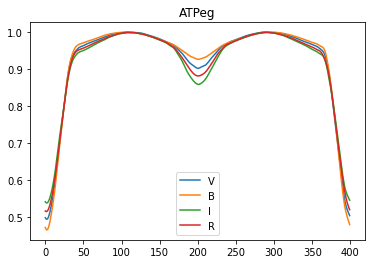

In [4]:
plt.plot(v1, label="V")
plt.plot(b1, label="B")
plt.plot(i1, label="I")
plt.plot(r1, label="R")
plt.legend()
plt.title("ATPeg")
plt.show()

In [5]:
df=pd.DataFrame([x1]*4, index=[0,1,2,3])
df["name"]=["ATPeg"]*4
df["filter"]=["V", "I", "R", "B"]
df["curve"]=[v1,b1,i1,r1]
df

,q,inc,omega1,omega2,T1,T2,P,Type,Spot,Ref,name,filter,curve
0,0.484,76.3,4.2,2.85,8360.0,5057.0,1.146065,detached,N,https://iopscience.iop.org/article/10.3847/000...,ATPeg,V,"[0.4986, 0.4955, 0.4943, 0.4956, 0.4995, 0.505..."
1,0.484,76.3,4.2,2.85,8360.0,5057.0,1.146065,detached,N,https://iopscience.iop.org/article/10.3847/000...,ATPeg,I,"[0.472, 0.4675, 0.4655, 0.4667, 0.4711, 0.4781..."
2,0.484,76.3,4.2,2.85,8360.0,5057.0,1.146065,detached,N,https://iopscience.iop.org/article/10.3847/000...,ATPeg,R,"[0.5416, 0.5392, 0.5384, 0.5393, 0.5421, 0.546..."
3,0.484,76.3,4.2,2.85,8360.0,5057.0,1.146065,detached,N,https://iopscience.iop.org/article/10.3847/000...,ATPeg,B,"[0.5167, 0.5152, 0.5154, 0.5174, 0.521, 0.5263..."


In [6]:
f2=open("BUVul.json")
d2=json.load(f2)
x2=d2["system_parameters"]
df=df.append([x2]*4, ignore_index=True)
df.loc[[4,5,6,7],["name"]]="BUVul"
df.loc[[4,5,6,7],["filter"]]=["V", "I", "R", "B"]
df.at[4,"curve"]=d2["interpolated_light_curves"]["V"]
df.at[5,"curve"]=d2["interpolated_light_curves"]["I"]
df.at[6,"curve"]=d2["interpolated_light_curves"]["R"]
df.at[7,"curve"]=d2["interpolated_light_curves"]["B"]
f2.close()

In [7]:
f3=open("FROri.json")
d3=json.load(f3)
x3=d3["system_parameters"]
df=df.append([x3]*2, ignore_index=True)
df.loc[[8,9],["name"]]="FROri"
df.loc[[8,9],["filter"]]=["V", "R"]
df.at[8,"curve"]=d3["interpolated_light_curves"]["V"]
df.at[9,"curve"]=d3["interpolated_light_curves"]["R"]
f3.close()

In [8]:
f5=open("IOUMA.json")
d5=json.load(f5)
x5=d5["system_parameters"]
df=df.append([x5]*3, ignore_index=True)
df.loc[[10,11,12],["name"]]="IOUMA"
df.loc[[10,11,12],["filter"]]=["V", "R", "B"]
df.at[10,"curve"]=d5["interpolated_light_curves"]["V"]
df.at[11,"curve"]=d5["interpolated_light_curves"]["R"]
df.at[12,"curve"]=d5["interpolated_light_curves"]["B"]
f5.close()

In [9]:
f6=open("LLCom.json")
d6=json.load(f6)
x6=d6["system_parameters"]
df=df.append([x6]*3, ignore_index=True)
df.loc[[13,14,15],["name"]]="LLCom"
df.loc[[13,14,15],["filter"]]=["V", "R", "B"]
df.at[13,"curve"]=d6["interpolated_light_curves"]["V"]
df.at[14,"curve"]=d6["interpolated_light_curves"]["R"]
df.at[15,"curve"]=d6["interpolated_light_curves"]["B"]
f6.close()

In [14]:
f11=open("V548Cyg.json")
d11=json.load(f11)
x11=d11["system_parameters"]
df=df.append([x11]*2, ignore_index=True)
df.loc[[16,17],["name"]]="V548Cyg"
df.loc[[16,17],["filter"]]=["V", "B"]
df.at[16,"curve"]=d11["interpolated_light_curves"]["V"]
df.at[17,"curve"]=d11["interpolated_light_curves"]["B"]
f11.close()

In [15]:
f12=open("v773cas.json")
d12=json.load(f12)
x12=d12["system_parameters"]
df=df.append([x12]*3, ignore_index=True)
df.loc[[18,19,20],["name"]]="v773cas"
df.loc[[18,19,20],["filter"]]=["V", "R", "B"]
df.at[18,"curve"]=d12["interpolated_light_curves"]["V"]
df.at[19,"curve"]=d12["interpolated_light_curves"]["R"]
df.at[20,"curve"]=d12["interpolated_light_curves"]["B"]
f12.close()

In [17]:
f14=open("Y Cam.json")
d14=json.load(f14)
x14=d14["system_parameters"]
df=df.append([x14]*1, ignore_index=True)
df.loc[[21],["name"]]="Y Cam"
df.loc[[21],["filter"]]=["V"]
df.at[21,"curve"]=d14["interpolated_light_curves"]["V"]
f14.close()

In [18]:
f15=open("WYHya.json")
d15=json.load(f15)
x15=d15["system_parameters"]
df=df.append([x15]*3, ignore_index=True)
df.loc[[22,23,24],["name"]]="WYHya"
df.loc[[22,23,24],["filter"]]=["V", "R", "B"]
df.at[22,"curve"]=d2["interpolated_light_curves"]["V"]
df.at[23,"curve"]=d2["interpolated_light_curves"]["R"]
df.at[24,"curve"]=d2["interpolated_light_curves"]["B"]
f15.close()

## 3. Data preparation
* We need to make specific changes:
    * change column names
    * unify values in specific column
    * calculate temperature ratio
    *calculate primary and secondary radius

In [19]:
df["Type"].replace({"detected": "detached"}, inplace=True)

In [20]:
df["Spot"].replace({"n": "N", "y": "Y"}, inplace=True)

In [21]:
df["t1_t2"]=df.T1/df.T2
df

2022-04-02 15:27:17,847 - 5044 - numexpr.utils - INFO: NumExpr defaulting to 8 threads.


,q,inc,omega1,omega2,T1,T2,P,Type,Spot,Ref,name,filter,curve,t1_t2
0,0.484,76.30,4.200,2.850,8360.0,5057.0,1.146065,detached,N,https://iopscience.iop.org/article/10.3847/000...,ATPeg,V,"[0.4986, 0.4955, 0.4943, 0.4956, 0.4995, 0.505...",1.653154
1,0.484,76.30,4.200,2.850,8360.0,5057.0,1.146065,detached,N,https://iopscience.iop.org/article/10.3847/000...,ATPeg,I,"[0.472, 0.4675, 0.4655, 0.4667, 0.4711, 0.4781...",1.653154
2,0.484,76.30,4.200,2.850,8360.0,5057.0,1.146065,detached,N,https://iopscience.iop.org/article/10.3847/000...,ATPeg,R,"[0.5416, 0.5392, 0.5384, 0.5393, 0.5421, 0.546...",1.653154
3,0.484,76.30,4.200,2.850,8360.0,5057.0,1.146065,detached,N,https://iopscience.iop.org/article/10.3847/000...,ATPeg,B,"[0.5167, 0.5152, 0.5154, 0.5174, 0.521, 0.5263...",1.653154
4,0.366,88.70,2.859,2.608,5940.0,3450.0,0.568990,detached,Y,https://academic.oup.com/pasj/article/70/4/72/...,BUVul,V,"[0.4113, 0.4087, 0.4076, 0.4083, 0.4108, 0.415...",1.721739
5,0.366,88.70,2.859,2.608,5940.0,3450.0,0.568990,detached,Y,https://academic.oup.com/pasj/article/70/4/72/...,BUVul,I,"[0.4472, 0.4461, 0.4455, 0.4454, 0.446, 0.4475...",1.721739
6,0.366,88.70,2.859,2.608,5940.0,3450.0,0.568990,detached,Y,https://academic.oup.com/pasj/article/70/4/72/...,BUVul,R,"[0.4303, 0.4292, 0.4284, 0.4278, 0.4279, 0.429...",1.721739
7,0.366,88.70,2.859,2.608,5940.0,3450.0,0.568990,detached,Y,https://academic.oup.com/pasj/article/70/4/72/...,BUVul,B,"[0.3927, 0.3923, 0.3926, 0.3936, 0.3954, 0.398...",1.721739
8,0.325,83.19,3.249,2.521,7830.0,4583.0,0.883162,detached,N,https//iopscience.iop.org/article/10.1088/0004...,FROri,V,"[0.4315, 0.4285, 0.4277, 0.4291, 0.4328, 0.438...",1.708488
9,0.325,83.19,3.249,2.521,7830.0,4583.0,0.883162,detached,N,https//iopscience.iop.org/article/10.1088/0004...,FROri,R,"[0.4117, 0.4079, 0.4073, 0.4103, 0.4168, 0.425...",1.708488


In [23]:
df["primary__equivalent_radius"] = df.apply(lambda row: calculate_requivalent_radii(row['q'], row['omega1'], row['omega2'])[0], axis = 1)

2022-04-02 15:27:18,183 - 5044 - binary_system.system - INFO: initialising object BinarySystem
2022-04-02 15:27:18,224 - 5044 - binary_system.system - INFO: setting discretization factor of primary component to 5.83 according to discretization factor of the companion.
2022-04-02 15:27:18,233 - 5044 - binary_system.system - INFO: initialising object BinarySystem
2022-04-02 15:27:18,279 - 5044 - binary_system.system - INFO: setting discretization factor of primary component to 5.83 according to discretization factor of the companion.
2022-04-02 15:27:18,288 - 5044 - binary_system.system - INFO: initialising object BinarySystem
2022-04-02 15:27:18,339 - 5044 - binary_system.system - INFO: setting discretization factor of primary component to 5.83 according to discretization factor of the companion.
2022-04-02 15:27:18,350 - 5044 - binary_system.system - INFO: initialising object BinarySystem
2022-04-02 15:27:18,399 - 5044 - binary_system.system - INFO: setting discretization factor of pri

In [24]:
df["secondary__equivalent_radius"] = df.apply(lambda row: calculate_requivalent_radii(row['q'], row['omega1'], row['omega2'])[1], axis = 1)

2022-04-02 15:27:19,370 - 5044 - binary_system.system - INFO: initialising object BinarySystem
2022-04-02 15:27:19,403 - 5044 - binary_system.system - INFO: setting discretization factor of primary component to 5.83 according to discretization factor of the companion.
2022-04-02 15:27:19,413 - 5044 - binary_system.system - INFO: initialising object BinarySystem
2022-04-02 15:27:19,452 - 5044 - binary_system.system - INFO: setting discretization factor of primary component to 5.83 according to discretization factor of the companion.
2022-04-02 15:27:19,463 - 5044 - binary_system.system - INFO: initialising object BinarySystem
2022-04-02 15:27:19,505 - 5044 - binary_system.system - INFO: setting discretization factor of primary component to 5.83 according to discretization factor of the companion.
2022-04-02 15:27:19,517 - 5044 - binary_system.system - INFO: initialising object BinarySystem
2022-04-02 15:27:19,551 - 5044 - binary_system.system - INFO: setting discretization factor of pri

* In the end we can save file into csv

In [25]:
df.to_csv("observed_det.csv")